# Machine Learning - Exercise 6
# Linear/kernel Regression

Example adapted from 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

## Import libraries and load data set

Using [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

For visualization purposes, data set is reduced to 1 dimension.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR


# Load the diabetes dataset
diabetes = datasets.load_diabetes()

print('Dataset: diabetes')
print('Number of features: %d' %diabetes.data.shape[1])
print('Number of samples: %d' %diabetes.data.shape[0])

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]


# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

print('Training set size: %d' %len(diabetes_X_train))
print('Test set size: %d' %len(diabetes_X_test))

print('Target range: [%.1f, %.1f]' %(min(diabetes.target),max(diabetes.target)))

Dataset: diabetes
Number of features: 10
Number of samples: 442
Training set size: 422
Test set size: 20
Target range: [25.0, 346.0]


## Train regression model

*   Linear regression ([info](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))
*   SVM with linear kernel ([info](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html))
*   SVM with polynomial kernel ([info](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html))




In [2]:
model_type = "linear_regression"  # "linear_regression", "linear_svm", "poly_svm"

if model_type == "linear_regression":
  # Create linear regression object
  model = linear_model.LinearRegression()
  # Train the model using the training sets
  model.fit(diabetes_X_train, diabetes_y_train)

elif model_type == "linear_svm":
  # SVM regression
  model = SVR(kernel='linear', C=1.5)
  # Train the model using the training sets
  model.fit(diabetes_X_train, diabetes_y_train)

elif model_type == "poly_svm":
  # SVM polynomial regression
  model = SVR(kernel='poly', C=1.5, degree=3, gamma='scale')
  # Train the model using the training sets
  model.fit(diabetes_X_train, diabetes_y_train)


## Prediction

In [3]:
# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# R2 regression score: 1 is perfect prediction
print('Regression score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


Mean squared error: 2548.07
Regression score: 0.47


## Plot results

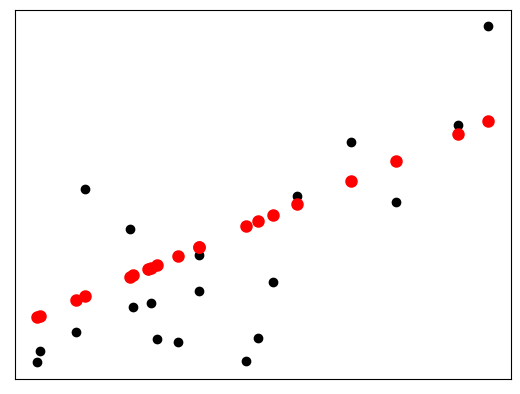

In [4]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.scatter(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

# Home Exercises

Tune the SVM regressors on a held-out validation set.

**Question 1**

Consider the hyper-parameter C in the Linear SVM and plot the testing performance as the paramater varies.

**Question 2**

Consider the hyper-parameters C and degree of the polynomial in the Polynomial SVM. Perform a grid search and show the obtained results.
